In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
class MLP_HW:

  def __init__(self, input_size, layers):
    self.n_features = input_size
    self.layer_info = layers
    
    #Weights List
    self.weights = [np.random.randn(input_size, layers[0])]
    for i in range(len(layers)-1):
      self.weights.append(np.random.randn(layers[i], layers[i+1]))

    #Bias List
    self.bias = [np.random.randn(1, i) for i in layers]

    #Del terms for each layer
    self.delta = [np.zeros([1, i]) for i in layers]

    #Activated Output of Each Layer
    self.a = [np.zeros([1, input_size])]
    self.a.extend([np.zeros([1, i]) for i in layers])


  def forward_prop(self, features):

    self.a[0] = np.array(features).reshape(1, -1)

    for i in range(len(self.weights)-1):
      self.a[i+1] = np.dot(self.a[i], self.weights[i]) + self.bias[i]
      self.a[i+1] = self.sigmoid(self.a[i+1]) 
  

    self.a[-1] = np.dot(self.a[-2], self.weights[-1]) + self.bias[-1]
    self.a[-1] = self.sigmoid(self.a[-1])

    return self.a[-1]


  def train(self, inputs, outputs, epochs = 10, learning_rate = 0.01):

    history = []
    for x in range(epochs):
      print('Running Epoch {}......'.format(x+1))
      cost = 0
      for i in range(inputs.shape[0]):
        cost += self.backprop(inputs[i], outputs[i], learning_rate)
        ## Code here to print weights as specified earlier
      for i in range (len(self.weights)):
        print("Layer {}".format(i))
        for j in range(len(self.weights[i])):
          for k in range(len(self.weights[i][j])):
            print("W_{}_{}: {}".format(j,k,self.weights[i][j][k]))
        for l in range(len(self.delta[i])):
          print("del_{}: {}".format(l,self.delta[i][0][l]))
          if(i == 0):

            print("del_{}: {}".format(l+1,self.delta[i][0][l+1]))
            
      history.append(cost[0])
    
    return history


  def backprop(self, input, output, lr):

    y_hat = self.forward_prop(input)

    cost = self.SqE(output, y_hat) 
    self.delta[-1] = self.a[-1] * np.sum(self.a[-1])  - output


    for i in range(len(self.weights)-1, 0, -1):
      self.delta[i-1] = np.dot(self.delta[i],self.weights[i].T)  *  (self.a[i] * (1 - self.a[i]))
      self.weights[i] -= lr*np.dot(self.a[i].T,self.delta[i])
      self.bias[i] -= lr*self.delta[i]

    self.weights[0] -= lr*np.dot(self.a[0].T,self.delta[0])
    self.bias[0] -= lr*self.delta[0]

    return cost


  def sigmoid(self, input):
    return 1 / (1 + np.exp(-input))


  def predict(self, input):
    out = np.argmax(self.forward_prop(input))
    return out


  def SqE(self, y, y_hat):
    error =0 ##TODO
    error += 0.5*(y - y_hat)**2
    return error


In [13]:
model = MLP_HW(2, [2, 1]) ## Fill Model Architecture

X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0, 1, 1, 0])

In [14]:
h = model.train(X, Y, epochs = 1000, learning_rate=0.5) ## Try different values (try very high eg. 50 and low eg. 0.0001)

Streaming output truncated to the last 5000 lines.
W_1_0: 5.911880454028186
W_1_1: -5.883662850499209
del_0: 0.0020343919685785923
del_1: 0.00234687785484803
Layer 1
W_0_0: 9.123016371659503
W_1_0: 9.154977530972099
del_0: 0.007664484256930526
Running Epoch 585......
Layer 0
W_0_0: -6.140078618719104
W_0_1: 5.673878930096679
W_1_0: 5.912953822806277
W_1_1: -5.884829282551452
del_0: 0.0020297448570385955
del_1: 0.002341268399597588
Layer 1
W_0_0: 9.12621575718545
W_1_0: 9.158212764465272
del_0: 0.007647625877554186
Running Epoch 586......
Layer 0
W_0_0: -6.141088253025762
W_0_1: 5.67507236385002
W_1_0: 5.914024643147695
W_1_1: -5.885992937588988
del_0: 0.002025117836292002
del_1: 0.0023356840847307166
Layer 1
W_0_0: 9.1294084030033
W_1_0: 9.161441058358646
del_0: 0.007630839795777281
Running Epoch 587......
Layer 0
W_0_0: -6.142095593803412
W_0_1: 5.6762629134152345
W_1_0: 5.915092926423654
W_1_1: -5.887153828012281
del_0: 0.002020510779170654
del_1: 0.0023301247459850648
Layer 1
W_0_0:

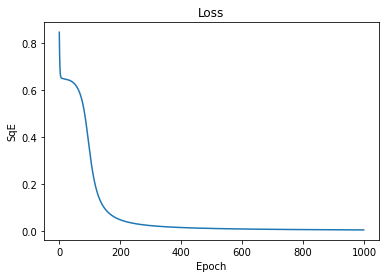

In [15]:

plt.plot(h)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("SqE")
plt.show()